In [5]:
import os
import pandas as pd

Dataset = "pubmed"
total_selected_group = 18
all_embedding = ["tf", "tf_idf","lsa", "pv_dm", "pv_dbow"]
pp_citation = "n2v"

In [25]:
''' plot all selected method with fixed threshold '''
step_threshold = 100
all_method = ["pv_dbow", "n2v", "concatenate(lsa, n2v)", "concatenate(pv-dm, n2v)", "concatenate(pv-dbow, n2v)"]
textual_embedding = ["pv_dbow"]
pp_citation = "n2v"
combined_embedding = ["lsa", "pv_dm", "pv_dbow"]
all_embedding_result_lr = []
all_embedding_result_svm = []

textual_embedding_lr_result = []
textual_embedding_svm_result = []
# ---------- load different textual embedding ------------------- #
for emb in textual_embedding:
    result_path = "../../result/"+Dataset+"/OCEN_global_emb_sample=140k/"
    # --------------------- textual only file name --------------------------- #
    result_filename = "(Global emb sample 140k) textual="+emb+"_threshold="+str(step_threshold)+"_namegroupcount="+str(total_selected_group)+".csv"
    final_path = os.path.normpath(os.path.join(result_path,result_filename))
    result = pd.read_csv(final_path)
    
    # ----------------------- read result data in --------------------- #
    textual_embedding_lr_result.append(result["logistic regression macro f1"].values)
    textual_embedding_svm_result.append(result["svc(linear) macro f1"].values)

all_embedding_result_lr.extend(textual_embedding_lr_result)
all_embedding_result_svm.extend(textual_embedding_svm_result)


# -------- load citation embedding ---------------------- #
citation_embedding_lr_result = []
citation_embedding_svm_result = []

result_path = "../../result/"+Dataset+"/OCEN_global_emb_sample=140k/"
result_filename = "(Global emb sample 140k) citation="+pp_citation+"_threshold="+str(step_threshold)+"_namegroupcount="+str(total_selected_group)+".csv"
final_path = os.path.normpath(os.path.join(result_path,result_filename))
result = pd.read_csv(final_path)
citation_embedding_lr_result.append(result["logistic regression macro f1"].values)
citation_embedding_svm_result.append(result["svc(linear) macro f1"].values)

all_embedding_result_lr.extend(citation_embedding_lr_result)
all_embedding_result_svm.extend(citation_embedding_svm_result)


# -------- load combined embedding ---------------------- #
combined_embedding_lr_result = []
combined_embedding_svm_result = []
for emb in combined_embedding:
    result_path = "../../result/"+Dataset+"/OCEN_global_emb_sample=140k/"
    # ------------------- combined result file name --------------------------#
    result_filename = "(Global emb sample 140k) citation = "+pp_citation+"_textual="+emb+"_threshold="+str(step_threshold)+"_namegroupcount="+str(total_selected_group)+".csv"
#     # --------------------- textual only file name --------------------------- #
#     result_filename = "(Global emb sample 140k) textual="+emb+"_threshold="+str(step_threshold)+"_namegroupcount="+str(total_selected_group)+".csv"
    final_path = os.path.normpath(os.path.join(result_path,result_filename))
    result = pd.read_csv(final_path)
    
    # ----------------------- read result data in --------------------- #
    combined_embedding_lr_result.append(result["logistic regression macro f1"].values)
    combined_embedding_svm_result.append(result["svc(linear) macro f1"].values)

name_group = result["Name Group"].values
print(name_group)

all_embedding_result_lr.extend(combined_embedding_lr_result)
all_embedding_result_svm.extend(combined_embedding_svm_result)

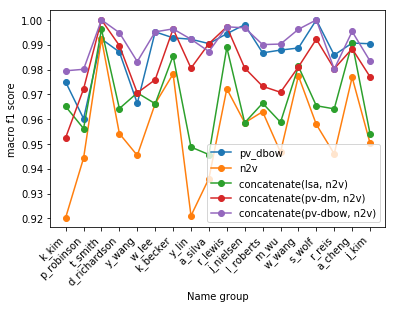

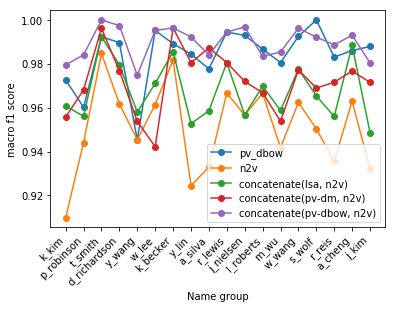

In [31]:
# -------------------- plot all together ------------------- #
%matplotlib inline
import matplotlib.pyplot as plt
#--------------   logistic regression --------------------------#
# process result into np array
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_method, all_embedding_result_lr):
    plt.xticks(range(len(result)), name_group)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.plot(result, marker='o', label=emb_type)
ax.autoscale_view()
plt.legend()
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
# plt.savefig('diff_combined_embedding_sample=140k_clf=LR_threshold=100.eps', format='eps', dpi=300)

#--------------   svm  -------------- --------------------------#
# process result into np array
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_method, all_embedding_result_svm):
    plt.xticks(range(len(result)), name_group)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.plot(result, marker='o', label=emb_type)
ax.autoscale_view()
plt.legend()
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
# plt.savefig('diff_combined_embedding_sample=140k_clf=svm_threshold=100.eps', format='eps', dpi=300)

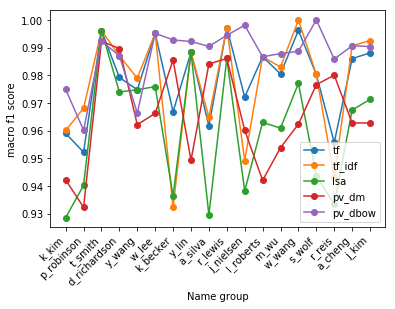

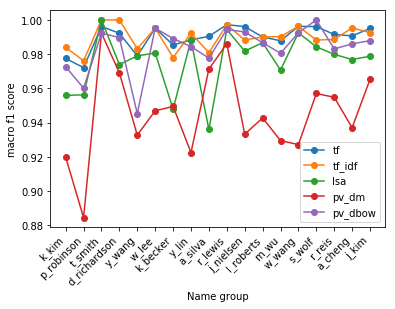

In [5]:
# ----------- plot f1 score w.r.t each name group on different textual embedding -------------- #
%matplotlib inline
import matplotlib.pyplot as plt
#--------------   logistic regression --------------------------#
# process result into np array
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_embedding, textual_embedding_lr_result):
    plt.xticks(range(len(result)), name_group)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.plot(result, marker='o', label=emb_type)
ax.autoscale_view()
plt.legend()
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
# plt.savefig('diff_embedding_sample=140k_clf=LR_threshold=100.eps', format='eps', dpi=300)

#--------------   svm  -------------- --------------------------#
# process result into np array
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_embedding, textual_embedding_svm_result):
    plt.xticks(range(len(result)), name_group)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.plot(result, marker='o', label=emb_type)
ax.autoscale_view()
plt.legend()
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
# plt.savefig('diff_embedding_sample=140k_clf=svm_threshold=100.eps', format='eps', dpi=300)

In [1]:
"""# --------------- different threshold mean f1 --------------------- #"""
# ----------- plot different embedding with different threshold ----------------- #
import os
import pandas as pd
from statistics import mean 

Dataset = "pubmed"
total_selected_group = 18
all_method = ["pv_dbow", "n2v", "concatenate(lsa, n2v)", "concatenate(pv-dm, n2v)", "concatenate(pv-dbow, n2v)"]
textual_embedding = ["pv_dbow"]
combined_embedding = ["lsa", "pv_dm", "pv_dbow"]
pp_citation = "n2v"
threshold_change = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


lr_all_embedding_mean_result = []
svm_all_embedding_mean_result = []
# ---------- load different textual embedding ------------------- #
for embedding in textual_embedding:
    result_path = "../../result/"+Dataset+"/OCEN_global_emb_sample=140k/"
    lr_result = []
    svm_result = []
    # --------------------- load different threshold --------------------------- #
    for step_threshold in threshold_change:
        result_filename = "(Global emb sample 140k) textual="+embedding+"_threshold="+str(step_threshold)+"_namegroupcount="+str(total_selected_group)+".csv"
        final_path = os.path.normpath(os.path.join(result_path,result_filename))
        result = pd.read_csv(final_path)
        
        # ----------------------- read result data in --------------------- #
        lr_result.append(mean(result["logistic regression macro f1"].values))
        svm_result.append(mean(result["svc(linear) macro f1"].values))
        
    lr_all_embedding_mean_result.append(lr_result)
    svm_all_embedding_mean_result.append(svm_result)


# -------- load citation embedding ---------------------- #
citation_embedding_lr_result = []
citation_embedding_svm_result = []
for step_threshold in threshold_change:
    result_path = "../../result/"+Dataset+"/OCEN_global_emb_sample=140k/"
    result_filename = "(Global emb sample 140k) citation="+pp_citation+"_threshold="+str(step_threshold)+"_namegroupcount="+str(total_selected_group)+".csv"
    final_path = os.path.normpath(os.path.join(result_path,result_filename))
    result = pd.read_csv(final_path)
    citation_embedding_lr_result.append(mean(result["logistic regression macro f1"].values))
    citation_embedding_svm_result.append(mean(result["svc(linear) macro f1"].values))

lr_all_embedding_mean_result.append(citation_embedding_lr_result)
svm_all_embedding_mean_result.append(citation_embedding_svm_result)


# ---------- load combined embedding ------------------- #
for emb in combined_embedding:
    result_path = "../../result/"+Dataset+"/OCEN_global_emb_sample=140k/"
    combined_embedding_lr_result = []
    combined_embedding_svm_result = []
    for step_threshold in threshold_change:
        # ------------------- combined result file name --------------------------#
        result_filename = "(Global emb sample 140k) citation = "+pp_citation+"_textual="+emb+"_threshold="+str(step_threshold)+"_namegroupcount="+str(total_selected_group)+".csv"
        final_path = os.path.normpath(os.path.join(result_path,result_filename))
        result = pd.read_csv(final_path)

        # ----------------------- read result data in --------------------- #
        combined_embedding_lr_result.append(mean(result["logistic regression macro f1"].values))
        combined_embedding_svm_result.append(mean(result["svc(linear) macro f1"].values))
    
    lr_all_embedding_mean_result.append(combined_embedding_lr_result)
    svm_all_embedding_mean_result.append(combined_embedding_svm_result)

In [2]:
print(lr_all_embedding_mean_result)
print(svm_all_embedding_mean_result)

[[0.8572495330091405, 0.905069103651836, 0.9236271714990371, 0.9463112309494073, 0.9555966268570545, 0.9671685672721997, 0.9727644180924574, 0.9830722514243608, 0.9883625401833923, 0.9874541067147181], [0.7498277720392034, 0.8281740036708996, 0.8647698255831765, 0.9028474372925239, 0.9201260416510354, 0.9348622480142379, 0.9368194927355292, 0.9488163041946321, 0.9567160856788859, 0.9559325752165716], [0.7699496838385953, 0.8481190377118395, 0.8859099143326526, 0.918590899721131, 0.9344638522272108, 0.9499176478030862, 0.9506271991860566, 0.9626495867643913, 0.9680279601108175, 0.9681456105409568], [0.8440414773538656, 0.8944156964229528, 0.915476627164847, 0.936700154970686, 0.9510805376034234, 0.9623840959082881, 0.9686481117165887, 0.9776691677825226, 0.9827682458778536, 0.9816193502902055], [0.8817163462225893, 0.9229611445290155, 0.9379713461244845, 0.9587761574580901, 0.9666956115113169, 0.9758417304739185, 0.9801315319656385, 0.9875001709552924, 0.9921015266424353, 0.991010006866

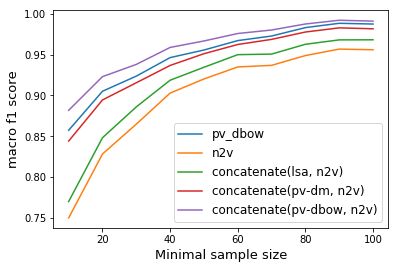

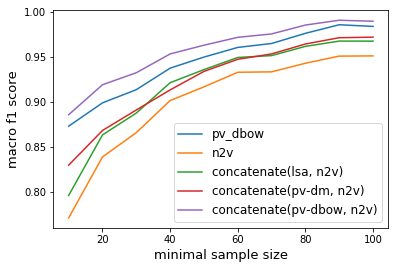

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# ------------------- parameter ------------------ #
label_font = 13

threshold_change = np.array(threshold_change)
#-------------- logistic regression --------------------------#
# process result into np array
lr_all_embedding_mean_result = np.array(lr_all_embedding_mean_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_method, lr_all_embedding_mean_result):
    plt.plot(threshold_change, result, label=emb_type)
plt.legend(prop={'size': 12})
plt.xlabel('Minimal sample size', fontsize=label_font)
plt.ylabel('macro f1 score', fontsize=label_font)
# plt.savefig('diff_combined_embedding_sample=140k_clf=lr.eps', format='eps', dpi=300)


# -------------------- svm -------------------------------------#
svm_all_embedding_mean_result = np.array(svm_all_embedding_mean_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_method, svm_all_embedding_mean_result):
    plt.plot(threshold_change, result, label=emb_type)
plt.legend(prop={'size': 12})
plt.xlabel('minimal sample size', fontsize=label_font)
plt.ylabel('macro f1 score', fontsize=label_font)
# plt.savefig('diff_combined_embedding_sample=140k_clf=SVM.eps', format='eps', dpi=300)

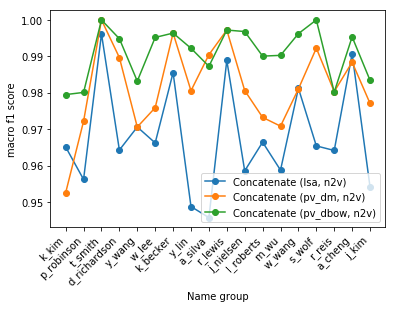

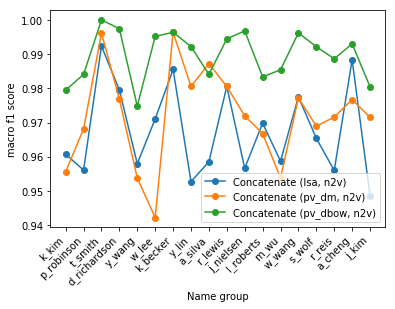

In [7]:
# ----------- plot f1 score w.r.t each name group on different combination of embedding -------------- #
%matplotlib inline
import matplotlib.pyplot as plt
#--------------   logistic regression --------------------------#
# process result into np array
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_embedding, combined_embedding_lr_result):
    emb_type = "Concatenate ("+emb_type+", n2v)"
    plt.xticks(range(len(result)), name_group)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.plot(result, marker='o', label=emb_type)
ax.autoscale_view()
plt.legend()
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
# plt.savefig('diff_combined_embedding_sample=140k_clf=LR_threshold=100.eps', format='eps', dpi=300)

#--------------   svm  -------------- --------------------------#
# process result into np array
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_embedding, combined_embedding_svm_result):
    emb_type = "Concatenate ("+emb_type+", n2v)"
    plt.xticks(range(len(result)), name_group)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.plot(result, marker='o', label=emb_type)
ax.autoscale_view()
plt.legend()
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
# plt.savefig('diff_combined_embedding_sample=140k_clf=svm_threshold=100.eps', format='eps', dpi=300)

In [4]:
"""# --------------- different feature --------------------- #"""
# --------------- load different feature result ------------ #
import os
import pandas as pd

Dataset = "pubmed"
total_selected_group = 18
all_feature = ['title', 'abstract', 'keywords_mesh', 'textual']
threshold_change = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


mnb_all_feature_result = []
lr_all_feature_result = []
svm_all_feature_result = []
# ---------- load different feature ------------------- #
for feature in all_feature:
    result_path = "../../result/"+Dataset+"/binary_global_emb_sample=140k/"+feature+"/"
    mnb_result = []
    lr_result = []
    svm_result = []
    # --------------------- load different threshold --------------------------- #
    for step_threshold in threshold_change:
        result_filename = "(Global emb sample 140k) textual=tf_feature="+feature+"_threshold="+str(step_threshold)+"_namegroupcount="+str(total_selected_group)+".csv"
        final_path = os.path.normpath(os.path.join(result_path,result_filename))
        result = pd.read_csv(final_path)

        # ----------------------- read result data in --------------------- #
        mnb_result.append(mean(result["MNB F1"].values))
        lr_result.append(mean(result["logistic regression f1"].values))
        svm_result.append(mean(result["svc(linear) f1"].values))
    mnb_all_feature_result.append(mnb_result)
    lr_all_feature_result.append(lr_result)
    svm_all_feature_result.append(svm_result)


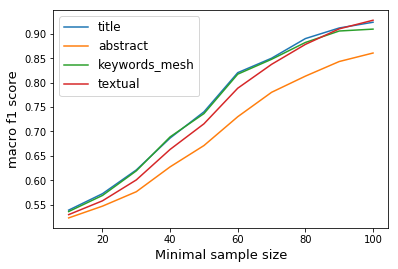

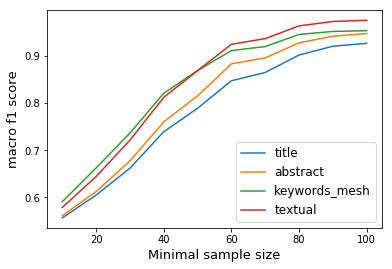

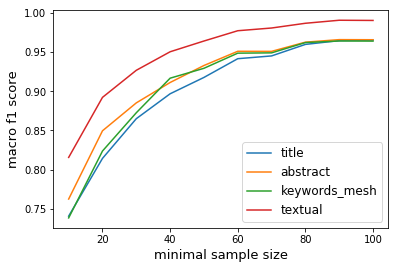

In [5]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# ------------------- parameter ------------------ #
label_font = 13

threshold_change = np.array(threshold_change)
#--------------   mnb --------------------------#
# process result into np array
mnb_all_feature_result = np.array(mnb_all_feature_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_feature, mnb_all_feature_result):
    plt.plot(threshold_change, result, label=emb_type)
plt.legend(prop={'size': 12})
plt.xlabel('Minimal sample size', fontsize=label_font)
plt.ylabel('macro f1 score', fontsize=label_font)
# plt.savefig('diff_feature_sample=140k_clf=mnb.eps', format='eps', dpi=300)

#-------------- logistic regression --------------------------#
# process result into np array
lr_all_feature_result = np.array(lr_all_feature_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_feature, lr_all_feature_result):
    plt.plot(threshold_change, result, label=emb_type)
plt.legend(prop={'size': 12})
plt.xlabel('Minimal sample size', fontsize=label_font)
plt.ylabel('macro f1 score', fontsize=label_font)
# plt.savefig('diff_feature_sample=140k_clf=lr.eps', format='eps', dpi=300)


# -------------------- svm -------------------------------------#
svm_all_feature_result = np.array(svm_all_feature_result)
fig = plt.figure()
ax = plt.axes()
for emb_type, result in zip(all_feature, svm_all_feature_result):
    plt.plot(threshold_change, result, label=emb_type)
plt.legend(prop={'size': 12})
plt.xlabel('minimal sample size', fontsize=label_font)
plt.ylabel('macro f1 score', fontsize=label_font)
# plt.savefig('diff_feature_sample=140k_clf=SVM.eps', format='eps', dpi=300)